## Todo Application Simple

In [ ]:
class Todo:
    def __init__(self, task_description):
        self.task_description = task_description
        self.completed = False
    def __str__(self):
        return f"Task: {self.task_description}, Completed: {self.completed}"

class User:
    def __init__(self, username):
        self.username = username
        self.todos = []
    
    def add_todo(self, task_description):
        todo = Todo(task_description)
        self.todos.append(todo)
        print(f"Added todo: {todo}")
    
    def complete_todo(self, task_description):
        for todo in self.todos:
            if todo.task_description == task_description:
                todo.completed = True
                print(f"Completed todo: {todo}")
                return
        print(f"Todo not found: {task_description}")
    
    def list_todos(self):
        if not self.todos:
            print("No todos found.")
        else:
            for todo in self.todos:
                print(todo)
    
    def __str__(self):
        pass
        


In [ ]:
# Example usage
user = User("john_doe")
user.add_todo("Buy groceries")
user.add_todo("Read a book")
user.list_todos()
user.complete_todo("Buy groceries")
user.list_todos()

Added todo: Task: Buy groceries, Completed: False
Added todo: Task: Read a book, Completed: False
Task: Buy groceries, Completed: False
Task: Read a book, Completed: False
Completed todo: Task: Buy groceries, Completed: True
Task: Buy groceries, Completed: True
Task: Read a book, Completed: False


## K-Means Clustering

In [17]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters = 3, max_iter = 100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
    
    def fit(self, X):
        #Get the no of samples and features
        n_samples, n_features = X.shape

        #Step 1: Randomly initilaizing Centroids
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        ## Check for Convergence for maximum iteration
        for _ in range(self.max_iter):

            ## Get the minimum l1 norm (euclidian distance) of each datapoint in my training set
            clusters = []
            for x in X:
                distances = np.linalg.norm(x - self.centroids, axis=1)
                cluster = np.argmin(distances)
                clusters.append(cluster)
            
            clusters = np.array(clusters)

            #Keep a copy of the all Old Centroid positions
            old_centroids = self.centroids.copy()

            ##Update the Centroids
            for c in range(self.n_clusters):
                cluster_points = X[clusters == c]
                if len(cluster_points) > 0:
                    # If there are points in the cluster, update the centroid
                    self.centroids[c] = cluster_points.mean(axis=0)
                else:
                    # If no points in the cluster, keep the old centroid    
                    self.centroids[c] = self.centroids[c]
            
            ## Check for the Convergence
            if np.all(np.linalg.norm(self.centroids - old_centroids, axis=1) < self.tol):
                break
            
        self.labels = clusters
        
    
    def predict(self, X):
        clusters = []
        for x in X:
            distances = np.linalg.norm(x - self.centroids, axis=1)
            cluster = np.argmin(distances)
            clusters.append(cluster)
        
        clusters = np.array(clusters)
        return clusters


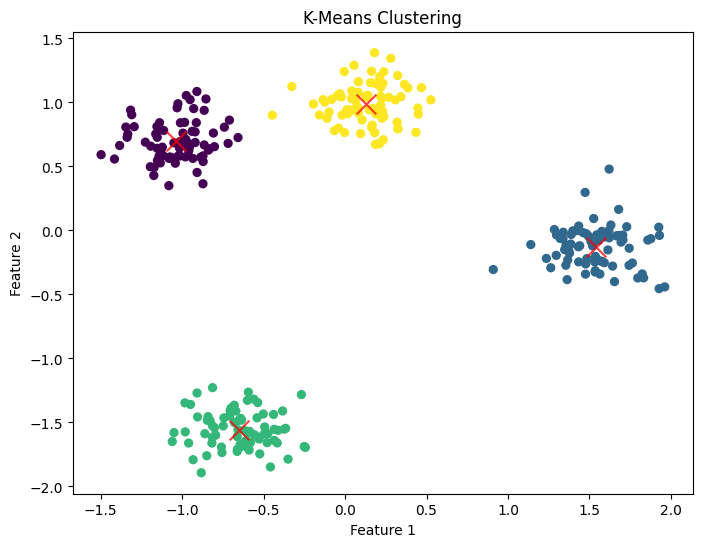

In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=4,random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_means = KMeans(n_clusters=4, max_iter=200, tol=1e-4)
k_means.fit(X)

y_pred = k_means.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=32, cmap='viridis')

centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [1]:
## Python Inheritance

class Animal:
    def __init__(self, name):
        self.name = name
    
    def speak(self):
        raise NotImplementedError("Subclasses must implement this method")
    
    def __str__(self):
        return f"Animal: {self.name}"

class Dog(Animal):
    def speak(self):
        return "Woof!"
    
    def __str__(self):
        return f"Dog: {self.name}"

class Cat(Animal):
    def speak(self):
        return "Meow!"
    
    def __str__(self):
        return f"Cat: {self.name}"

# Example usage
dog = Dog("Buddy")
cat = Cat("Whiskers")
print(dog)  # Output: Dog: Buddy
print(cat)  # Output: Cat: Whiskers

print(dog.speak())  # Output: Woof!
print(cat.speak())  # Output: Meow!

Dog: Buddy
Cat: Whiskers
Woof!
Meow!


In [2]:
## Principal Component Analysis (PCA)
import numpy as np

class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
    
    def fit(self, X):
        # Step 1: Standardize the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        # Step 2: Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)
        
        # Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # Step 4: Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components_ = eigenvectors[:, sorted_indices][:, :self.n_components]
    
    def transform(self, X):
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_)

# Example usage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SklearnPCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)   
X_pca = pca.transform(X_scaled)
print("PCA Components:\n", pca.components_)

PCA Components:
 [[-0.52106591  0.37741762]
 [ 0.26934744  0.92329566]
 [-0.5804131   0.02449161]
 [-0.56485654  0.06694199]]


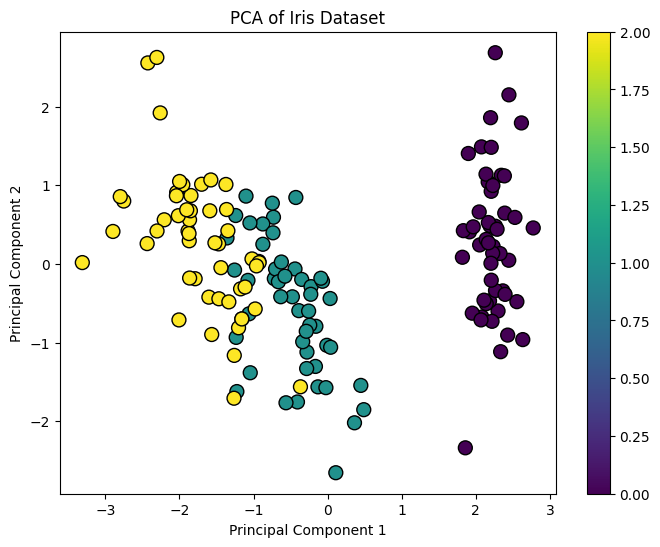

In [3]:
# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
